In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install -q tensorflow==2.1.0

In [0]:
df = pd.read_csv('cancer_classification.csv')

## **Exploratory Analysis**

In [0]:
# to check if any columns has null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


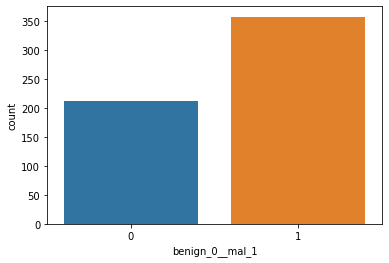

In [0]:
sns.countplot(x='benign_0__mal_1', data=df)

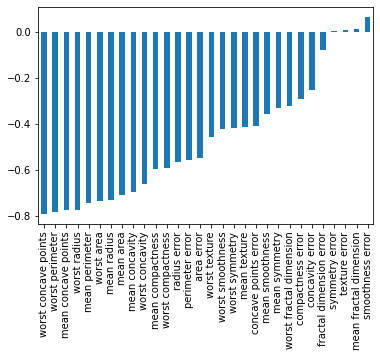

In [0]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

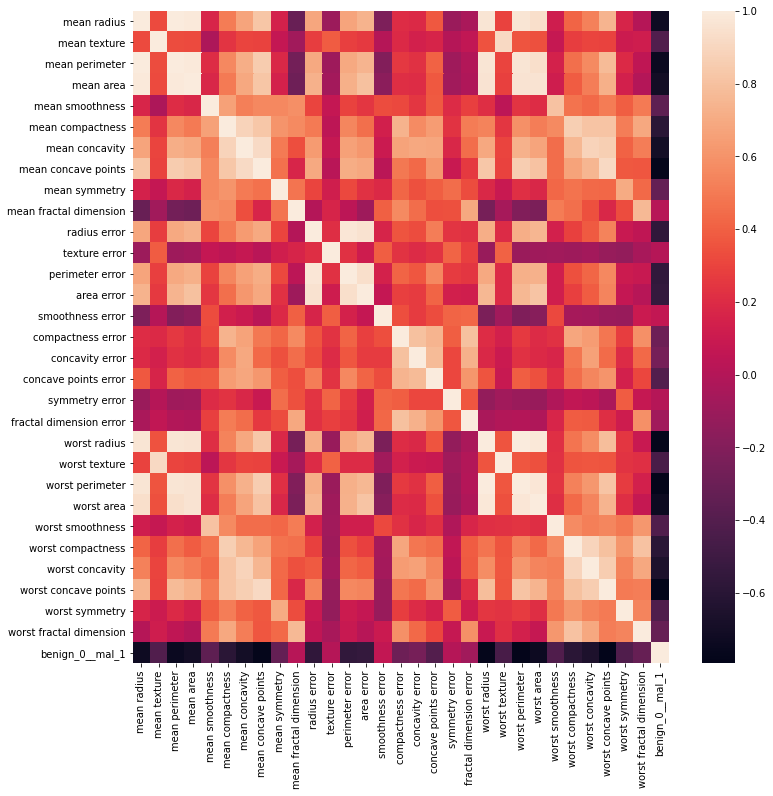

In [0]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr())

## **Processing**

In [0]:
X = df.drop('benign_0__mal_1', axis=1).values

In [0]:
y = df['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

## **Build Model**

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense, Dropout

In [0]:
# to check number of columns so we can select same number of
# neurons at first layer.
X_train.shape

(426, 30)

In [0]:
model = Sequential()

In [0]:
model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 962us/sample - loss: 0.6689 - val_loss: 0.6532
Epoch 2/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6340 - val_loss: 0.6168
Epoch 3/600
426/426 [==============================] - 0s 77us/sample - loss: 0.5954 - val_loss: 0.5784
Epoch 4/600
426/426 [==============================] - 0s 83us/sample - loss: 0.5553 - val_loss: 0.5372
Epoch 5/600
426/426 [==============================] - 0s 80us/sample - loss: 0.5123 - val_loss: 0.4896
Epoch 6/600
426/426 [==============================] - 0s 80us/sample - loss: 0.4670 - val_loss: 0.4427
Epoch 7/600
426/426 [==============================] - 0s 77us/sample - loss: 0.4205 - val_loss: 0.3946
Epoch 8/600
426/426 [==============================] - 0s 81us/sample - loss: 0.3785 - val_loss: 0.3545
Epoch 9/600
426/426 [==============================] - 0s 79us/sample - loss: 0.3426 - val_loss: 0.3203
Epoch 10/600
426/

In [0]:
losses = pd.DataFrame(model.history.history)

In [0]:
losses

,loss,val_loss
0,0.668931,0.653169
1,0.633985,0.616842
2,0.595421,0.578350
3,0.555288,0.537154
4,0.512331,0.489603
...,...,...
595,0.004393,0.351514
596,0.004403,0.345635
597,0.005632,0.326090
598,0.004765,0.365563


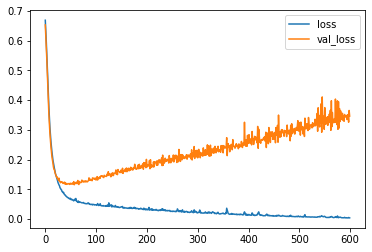

In [0]:
losses.plot()

In [0]:
# since model was overfitted, we will use early stopping
# callback this time. 

model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, the direction is automatically inferred
 |          from the name of the monitored quantity.
 |      baseline: Baseline value for the mo

In [0]:
early_stop= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [44]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 968us/sample - loss: 0.6622 - val_loss: 0.6574
Epoch 2/600
426/426 [==============================] - 0s 121us/sample - loss: 0.6314 - val_loss: 0.6223
Epoch 3/600
426/426 [==============================] - 0s 98us/sample - loss: 0.5917 - val_loss: 0.5744
Epoch 4/600
426/426 [==============================] - 0s 142us/sample - loss: 0.5454 - val_loss: 0.5291
Epoch 5/600
426/426 [==============================] - 0s 110us/sample - loss: 0.5011 - val_loss: 0.4810
Epoch 6/600
426/426 [==============================] - 0s 108us/sample - loss: 0.4550 - val_loss: 0.4315
Epoch 7/600
426/426 [==============================] - 0s 120us/sample - loss: 0.4115 - val_loss: 0.3859
Epoch 8/600
426/426 [==============================] - 0s 106us/sample - loss: 0.3710 - val_loss: 0.3451
Epoch 9/600
426/426 [==============================] - 0s 120us/sample - loss: 0.3359 - val_loss: 0.3090
Epoch 10/6

In [0]:
model_loss = pd.DataFrame(model.history.history)

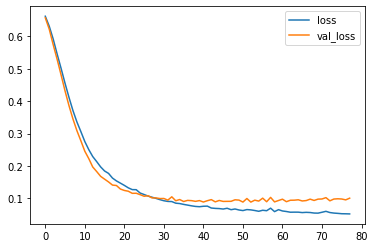

In [46]:
model_loss.plot()

In [0]:
from tensorflow.keras.layers import Dropout

In [0]:
# since model was overfitted, we will use early stopping
# callback this time. 

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
early_stop= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [50]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.7309 - val_loss: 0.6929
Epoch 2/600
426/426 [==============================] - 0s 115us/sample - loss: 0.7020 - val_loss: 0.6796
Epoch 3/600
426/426 [==============================] - 0s 108us/sample - loss: 0.6807 - val_loss: 0.6698
Epoch 4/600
426/426 [==============================] - 0s 114us/sample - loss: 0.6699 - val_loss: 0.6590
Epoch 5/600
426/426 [==============================] - 0s 115us/sample - loss: 0.6564 - val_loss: 0.6466
Epoch 6/600
426/426 [==============================] - 0s 124us/sample - loss: 0.6570 - val_loss: 0.6356
Epoch 7/600
426/426 [==============================] - 0s 117us/sample - loss: 0.6363 - val_loss: 0.6206
Epoch 8/600
426/426 [==============================] - 0s 108us/sample - loss: 0.6228 - val_loss: 0.6030
Epoch 9/600
426/426 [==============================] - 0s 109us/sample - loss: 0.6031 - val_loss: 0.5785
Epoch 10/60

In [0]:
model_loss = pd.DataFrame(model.history.history)

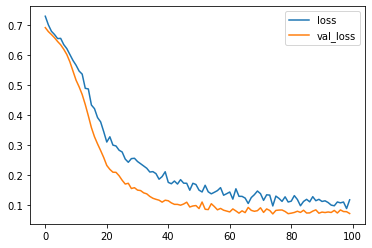

In [52]:
model_loss.plot()

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [57]:
print(confusion_matrix(y_test, predictions))

[[53  2]
 [ 1 87]]
